# Generate Locations in Jabodetabek from Shapefiles

To provide data seeding of at least 750,000 pharmacies in Jabodetabek

## Dataset

- https://www.indonesia-geospasial.com/2020/01/shp-rbi-provinsi-dki-jakarta-perwilayah.html
- https://www.indonesia-geospasial.com/2020/01/shp-rbi-provinsi-jawa-barat-perwilayah.html
- https://www.indonesia-geospasial.com/2020/01/shp-rbi-provinsi-banten-perwilayah.html

1. Jakarta Barat
2. Jakarta Timur
3. Jakarta Pusat
4. Jakarta Utara
5. Jakarta Selatan
6. Kepulauan Seribu
7. Bogor
8. Kab. Bogor
9. Depok
10. Bekasi
11. Kab. Bekasi
12. Tangerang
13. Kab. Tangerang
14. Tangerang Selatan

## Setup

In [1]:
!pip install tqdm

In [2]:
!pip install gdown

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import random
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from tqdm import tqdm

In [4]:
# !gdown 11wI-miDLaBmPZroaX1VAT-nQkud1TFHJ # Jakarta Barat
# !gdown 1YfQdK0-MrogjtCAbrLV5mUoXBq9AOG_u # Jakarta Timur
# !gdown 1L7bc6xR_1h10AVN-uXczAWWQ2lOyswXP # Jakarta Pusat
# !gdown 1BjsijSoCX0X3I6UpRXWJSGo6OezPMQJ_ # Jakarta Utara
# !gdown 1DiGMr7WDzwTBFBh-lO_ksvt6vsQ-3Ca5 # Jakarta Selatan
# !gdown 1WgSYVEa2XNMeI_xYMsVy2DPjPyIcH-q0 # Kepulauan Seribu

# !gdown 1OgXZZwbV4ge1wQxihW8yVdUVhuNqTzOv # Kab. Bekasi
# !gdown 16Nvxx98i9O2eb8c_6O7NhwSVFaVaeRq- # Bekasi
# !gdown 1unPzax8Guzcu300fGuRkUlK_W1Oz-D_D # Kab. Bogor
# !gdown 1cEDVyqjyiTPtq5ric05vnUw0qB8Fa7P4 # Bogor
# !gdown 1MjLNzaiDdnsnggx5rd94tVu0-ifIVv2O # Depok

!gdown 1oZeUdQNM_L92iZ4dANsguM_gW2JnwH9F # Kab. Tangerang
# !gdown 1DhBi_qlDqRqmu_dnFnmRWs0un7fdvmcW # Tangerang
# !gdown 1F5GKqg6FlAVkCovZ0Sl0cn5zSRybTy3A # Tangerang Selatan


Downloading...
From: https://drive.google.com/uc?id=1oZeUdQNM_L92iZ4dANsguM_gW2JnwH9F
To: /content/KAB. TANGERANG.rar
100% 30.0M/30.0M [00:00<00:00, 36.9MB/s]


In [5]:
# !unrar x /content/KOTA_JAKARTA_BARAT.rar /content/
# !unrar x /content/KOTA_JAKARTA_TIMUR.rar /content/
# !unrar x /content/KOTA_JAKARTA_PUSAT.rar /content/
# !unrar x /content/KOTA_JAKARTA_UTARA.rar /content/
# !unrar x /content/KOTA_JAKARTA_SELATAN.rar /content/
# !unrar x /content/KAB_KEPULAUAN_SERIBU.rar /content/

# !unrar x "/content/KAB. BEKASI.rar" /content/
# !unrar x "/content/KOTA BEKASI.rar" /content/
# !unrar x "/content/KAB. BOGOR.rar" /content/
# !unrar x "/content/KOTA BOGOR.rar" /content/
# !unrar x "/content/KOTA DEPOK.rar" /content/

!unrar x "/content/KAB. TANGERANG.rar" /content/
# !unrar x "/content/KOTA TANGERANG.rar" /content/
# !unrar x "/content/KOTA TANGERANG SELATAN.rar" /content/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/KAB. TANGERANG.rar

Creating    /content/KAB. TANGERANG                                   OK
Extracting  /content/KAB. TANGERANG/ADMINISTRASIDESA_AR_25K.cpg            0%  OK 
Extracting  /content/KAB. TANGERANG/ADMINISTRASIDESA_AR_25K.dbf            0%  OK 
Extracting  /content/KAB. TANGERANG/ADMINISTRASIDESA_AR_25K.prj            0%  OK 
Extracting  /content/KAB. TANGERANG/ADMINISTRASIDESA_AR_25K.sbn            0%  OK 
Extracting  /content/KAB. TANGERANG/ADMINISTRASIDESA_AR_25K.sbx            0%  OK 
Extracting  /content/KAB. TANGERANG/ADMINISTRASIDESA_AR_25K.shp            4%  OK 
Extracting  /content/KAB. TANGERANG/ADMINISTRASIDESA_AR_25K.shp.xml        4%  OK 
Extracting  /content/KAB. TANGERANG/ADMINISTRASIDESA_AR_25K.shx            4%  OK 
Extracting  /content/KAB. TANGERANG/ADMINISTRASI_LN_25K.cpg           

In [6]:
PATH_JAKBAR = "/content/KOTA_JAKARTA_BARAT/KOTA_JAKARTA_BARAT/ADMINISTRASIDESA_AR_25K.shp"
PATH_JAKTIM = "/content/KOTA_JAKARTA_TIMUR/KOTA_JAKARTA_TIMUR/ADMINISTRASIDESA_AR_25K.shp"
PATH_JAKPUS = "/content/KOTA_JAKARTA_PUSAT/KOTA_JAKARTA_PUSAT/ADMINISTRASIDESA_AR_25K.shp"
PATH_JAKUT = "/content/KOTA_JAKARTA_UTARA/KOTA_JAKARTA_UTARA/ADMINISTRASIDESA_AR_25K.shp"
PATH_JAKSEL = "/content/KOTA_JAKARTA_SELATAN/KOTA_JAKARTA_SELATAN/ADMINISTRASIDESA_AR_25K.shp"
PATH_KEP_SERIBU = "/content/KAB_KEPULAUAN_SERIBU/KAB_KEPULAUAN_SERIBU/ADMINISTRASIDESA_AR_25K.shp"

PATH_KAB_BEKASI = "/content/KAB. BEKASI/ADMINISTRASIDESA_AR_25K.shp"
PATH_BEKASI = "/content/KOTA BEKASI/ADMINISTRASIDESA_AR_25K.shp"
PATH_KAB_BOGOR = "/content/KAB. BOGOR/ADMINISTRASIDESA_AR_25K.shp"
PATH_BOGOR = "/content/KOTA BOGOR/ADMINISTRASIDESA_AR_25K.shp"
PATH_DEPOK = "/content/KOTA DEPOK/ADMINISTRASIDESA_AR_25K.shp"

PATH_KAB_TANGERANG = "/content/KAB. TANGERANG/ADMINISTRASIDESA_AR_25K.shp"
PATH_TANGERANG = "/content/KOTA TANGERANG/ADMINISTRASIDESA_AR_25K.shp"
PATH_TANGERANG_SELATAN = "/content/KOTA TANGERANG SELATAN/ADMINISTRASIDESA_AR_25K.shp"

In [7]:
paths = [
    # PATH_JAKBAR,
    # PATH_JAKTIM,
    # PATH_JAKPUS,
    # PATH_JAKUT,
    # PATH_JAKSEL,
    # PATH_KEP_SERIBU,

    # PATH_DEPOK,
    # PATH_KAB_BEKASI,
    # PATH_BEKASI,
    # PATH_BOGOR,
    # PATH_KAB_BOGOR,

    PATH_KAB_TANGERANG,
    # PATH_TANGERANG,
    # PATH_TANGERANG_SELATAN

]

In [8]:
%%time
map_gdf = gpd.GeoDataFrame()
for path in paths:
  gdf = gpd.read_file(path)
  map_gdf = pd.concat([map_gdf, gdf]).drop_duplicates().reset_index(drop=True)

CPU times: user 136 ms, sys: 50.6 ms, total: 187 ms
Wall time: 571 ms


In [9]:
map_gdf.head(3)

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,...,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry
0,None,Ancolpasir,Wilayah Administrasi Keluruhan/Desa,None,None,0.0,None,None,BA0020,None,...,Jambe,None,Tangerang,None,Banten,None,0,0.071865,0.000147,"POLYGON Z ((106.51594 -6.31565 0, 106.516 -6.3..."
1,None,Babakan,Wilayah Administrasi Keluruhan/Desa,None,None,0.0,None,None,BA0020,None,...,Legok,None,Tangerang,None,Banten,None,0,0.080055,0.000174,"POLYGON Z ((106.59955 -6.30138 0, 106.59944 -6..."
2,None,Babakan,Wilayah Administrasi Keluruhan/Desa,None,None,0.0,None,None,BA0020,None,...,Tenjo,None,Bogor,None,Jawa Barat,None,0,0.182739,0.001343,"MULTIPOLYGON Z (((106.49215 -6.35501 0, 106.49..."


In [10]:
map_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
map_gdf['WADMKK'].unique()

array(['Tangerang', 'Bogor', 'Kota Tangerang', 'Serang',
       'Kota Tangerang Selatan', 'Lebak', 'Kota Jakarta Barat',
       'Kota Jakarta Utara'], dtype=object)

In [12]:
map_gdf = map_gdf.loc[(map_gdf['WADMKK'] == 'Tangerang')]

In [13]:
map_gdf.tail(3)

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,...,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry
333,None,Laksana,Wilayah Administrasi Keluruhan/Desa,None,None,0.0,None,None,BA0020,None,...,Pakuhaji,None,Tangerang,None,Banten,None,0,0.092043,0.000304,"POLYGON Z ((106.61962 -6.07094 0, 106.61962 -6..."
334,None,Kiarapayung,Wilayah Administrasi Keluruhan/Desa,None,None,0.0,None,None,BA0020,None,...,Pakuhaji,None,Tangerang,None,Banten,None,0,0.113018,0.000304,"POLYGON Z ((106.62453 -6.07151 0, 106.6245 -6...."
335,None,Kohod,BA00200,None,None,0.0,None,None,BA00200,None,...,Pakuhaji,None,Tangerang,None,Banten,None,0,0.141424,0.000735,"POLYGON Z ((106.63619 -6.01083 0, 106.63618 -6..."


In [14]:
len(map_gdf)

270

## Generate Random Point

In [15]:
def generate_random_points(polygon, num_points):
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds

    while len(points) < num_points:
        random_longitude = random.uniform(min_x, max_x)
        random_latitude = random.uniform(min_y, max_y)
        random_point = Point(random_longitude, random_latitude)

        if polygon.contains(random_point):
            points.append(random_point)

    return points

In [16]:
%%time
random_points = []
multiplier = 100000   # can be adjusted
factor = 40           # can be adjusted

for _, row in tqdm(map_gdf.iterrows()):
    subdistrict_name = row['NAMOBJ']
    district_name = row['WADMKC']
    city_name = row['WADMKK']
    province_name = row['WADMPR']
    polygon = row['geometry']
    shape_area = row['SHAPE_Area']

    if polygon.geom_type == 'MultiPolygon':
      polygon = polygon.convex_hull

    points = generate_random_points(polygon, num_points = shape_area * multiplier * factor) # for more proportional distribution

    for idx in range(len(points)):
        random_points.append({
            'name': 'Apotek {} {}'.format(subdistrict_name, idx+1),
            'subdistrict': subdistrict_name,
            'district': district_name,
            'city': city_name,
            'province': province_name,
            'latitude': points[idx].y,
            'longitude': points[idx].x
        })

270it [01:09,  3.89it/s]

CPU times: user 1min 5s, sys: 641 ms, total: 1min 5s
Wall time: 1min 9s


In [17]:
points_df = pd.DataFrame(random_points)
points_df.head()

,name,subdistrict,district,city,province,latitude,longitude
0,Apotek Ancolpasir 1,Ancolpasir,Jambe,Tangerang,Banten,-6.306764,106.503574
1,Apotek Ancolpasir 2,Ancolpasir,Jambe,Tangerang,Banten,-6.313754,106.512089
2,Apotek Ancolpasir 3,Ancolpasir,Jambe,Tangerang,Banten,-6.312298,106.509865
3,Apotek Ancolpasir 4,Ancolpasir,Jambe,Tangerang,Banten,-6.313663,106.512692
4,Apotek Ancolpasir 5,Ancolpasir,Jambe,Tangerang,Banten,-6.310701,106.510086


In [18]:
len(points_df)

334918

In [19]:
points_gdf_cleaned = points_df.drop_duplicates(subset=['longitude', 'latitude'])
len(points_gdf_cleaned)

334918

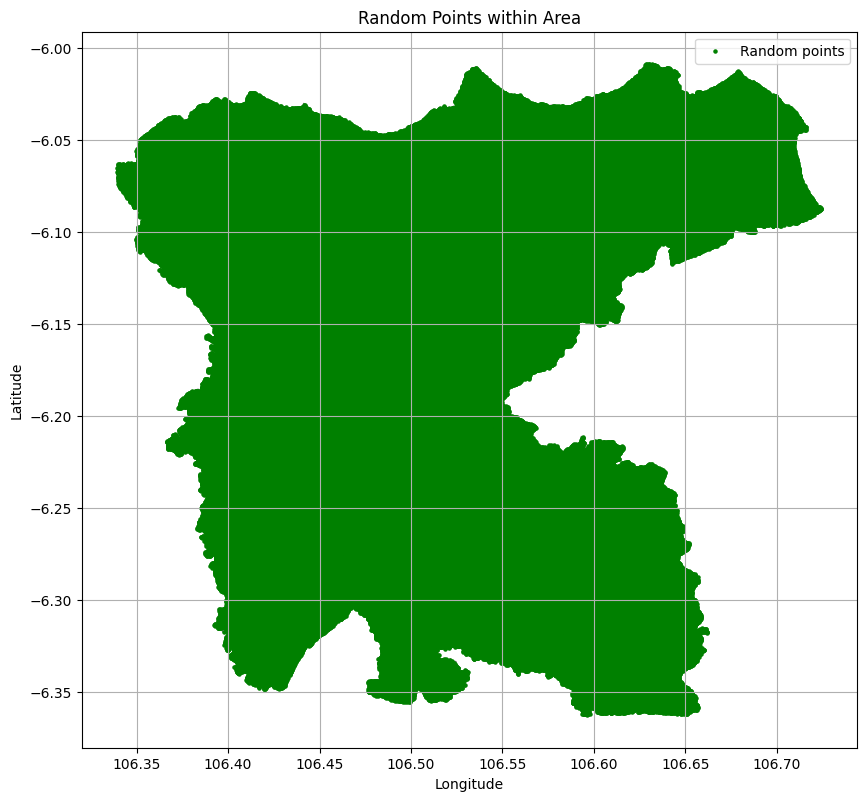

In [20]:
points_gdf_cleaned = gpd.GeoDataFrame(
    points_df,
    geometry=gpd.points_from_xy(points_df.longitude, points_df.latitude),
    crs=map_gdf.crs
)

fig, ax = plt.subplots(figsize=(10, 10))
map_gdf.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)
points_gdf_cleaned.plot(ax=ax, color='green', markersize=5, label='Random points')

ax.legend()
ax.set_title('Random Points within Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()

## Export

In [21]:
import os
os.makedirs('output', exist_ok=True)
points_gdf_cleaned.to_csv('output/out.csv')